# Example of data extraction and analysis on MMSAH dataset

## Import Library

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import numpy
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
from function_code import open_data, circadian, HRV_analysis

## Download dataset

In [3]:
# !pip install wfdb
# import wfdb

In [4]:
# !pip install wget
# !wget -r -N -c -np https://physionet.org/files/mmash/1.0.0/

In [5]:
# import os
# url = 'https://physionet.org/files/mmash/1.0.0/'
# os.system("""wget -r -N -c -np https://physionet.org/files/mmash/1.0.0/""")

## Analysis

In [6]:
# path = 'MMASH/DataPaper/' # Select the path where the data are allocated
path = '../multilevel-monitoring-of-activity-and-sleep-in-healthy-people-1.0.0/DataPaper' # Select the path where the data are allocated
users = os.listdir(path)[:-1] # Cerate a list of users' name

### Antropometric characteristics

In [7]:
df_antro = open_data.create_dataset(users,'user_info',path) # Import dataset with antropometric characteristics

In [8]:
df_antro.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Weight,21.0,75.285714,13.054282,60.0,67.0,70.0,80.00,115.0
Height,21.0,180.142857,8.344374,169.0,175.0,180.0,183.00,205.0
Age,20.0,27.650000,3.963983,22.0,25.0,27.0,28.25,40.0


AttributeError: 'PolyCollection' object has no property 'c'

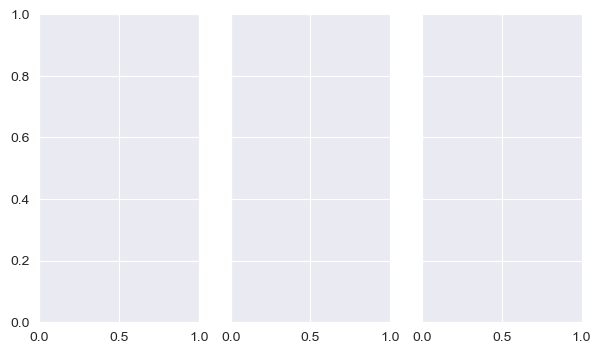

In [9]:
# Density plot of the users' antropometric characteristic distributions

f,ax = plt.subplots(1,3,figsize=(7,4),sharey=True)

for col,i,xlabel,color in zip(['Age','Weight','Height'],list(range(3)),['years','kg','cm'],['b','r','g']):
    sns.kdeplot(df_antro[col], ax=ax[i], c=color, shade=True)
    ax[i].set_title(col,fontsize=20)
    ax[i].set_xlabel(xlabel,fontsize=13)
    ax[i].legend().set_visible(False)

ax[0].set_ylabel('density',fontsize=13)

f.tight_layout()
plt.show()

### Questionnaire

In [7]:
df_question = open_data.create_dataset(users,'questionnaire') # Import dataset with questionnaire data

In [8]:
df_question.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
MEQ,21.0,50.619048,7.053199,38.0,46.0,50.0,55.00,64.0
STAI1,21.0,35.619048,8.535082,24.0,29.0,33.0,41.00,54.0
STAI2,20.0,41.400000,5.557356,27.0,39.0,42.5,45.25,49.0
Pittsburgh,21.0,5.142857,1.851640,2.0,4.0,5.0,7.00,9.0
Daily_stress,21.0,31.904762,16.646035,10.0,22.0,30.0,41.00,74.0
BISBAS_bis,21.0,22.428571,2.461126,19.0,20.0,22.0,24.00,26.0
BISBAS_reward,21.0,19.619048,2.692140,14.0,18.0,19.0,21.00,25.0
BISBAS_drive,21.0,12.142857,2.080522,8.0,11.0,12.0,14.00,16.0
BISBAS_fun,21.0,10.857143,3.468223,5.0,8.0,11.0,14.00,16.0
panas_pos_10,21.0,27.190476,4.791858,21.0,23.0,28.0,30.00,37.0


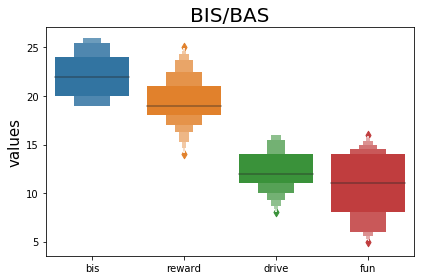

In [10]:
# Boxplot BIS/BAS for each component

df_group_BISBAS = pd.DataFrame()
for col in ['BISBAS_bis','BISBAS_reward','BISBAS_drive','BISBAS_fun']:
    df_BISBAS = pd.DataFrame(df_question[col]).rename(columns={col:'BISBAS'})
    df_BISBAS['var'] = col
    df_group_BISBAS = pd.concat([df_group_BISBAS,df_BISBAS])
    
f,ax = plt.subplots()
sns.boxenplot(df_group_BISBAS['var'],df_group_BISBAS['BISBAS'], ax=ax)
plt.xticks(list(range(4)),['bis','reward','drive','fun'])
ax.set_xlabel('')
ax.set_ylabel('values',fontsize=15)
ax.set_title('BIS/BAS',fontsize=20)
f.tight_layout()
plt.show()

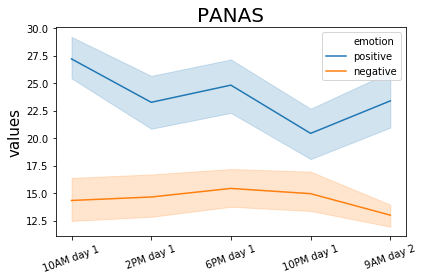

In [11]:
# Daily evolution of Positive and Negative emotions (PANAS)

df_group_Panas = pd.DataFrame()
for col in ['panas_pos_10','panas_pos_14','panas_pos_18','panas_pos_22','panas_pos_9+1']:
    df_PANAS = pd.DataFrame(df_question[col]).rename(columns={col:'PANAS'})
    df_PANAS['var'] = col
    df_PANAS['emotion'] = 'positive'
    df_group_Panas = pd.concat([df_group_Panas,df_PANAS])

for col in ['panas_neg_10','panas_neg_14','panas_neg_18','panas_neg_22','panas_neg_9+1']:
    df_PANAS = pd.DataFrame(df_question[col]).rename(columns={col:'PANAS'})
    df_PANAS['var'] = col
    df_PANAS['emotion'] = 'negative'
    df_group_Panas = pd.concat([df_group_Panas,df_PANAS])

df_group_Panas = df_group_Panas.replace({'panas_pos_10':'1_10AM day 1','panas_pos_14':'2_2PM day 1','panas_pos_18':'3_6PM day 1','panas_pos_22':'4_10PM day 1','panas_pos_9+1':'5_9AM day 2',
                                         'panas_neg_10':'1_10AM day 1','panas_neg_14':'2_2PM day 1','panas_neg_18':'3_6PM day 1','panas_neg_22':'4_10PM day 1','panas_neg_9+1':'5_9AM day 2'})

f,ax = plt.subplots()
sns.lineplot(x="var", y="PANAS", hue='emotion', data=df_group_Panas)
plt.xticks(list(range(5)),['10AM day 1', '2PM day 1', '6PM day 1', '10PM day 1', '9AM day 2'], rotation = 20)
ax.set_xlabel('')
ax.set_ylabel('values',fontsize=15)
ax.set_title('PANAS',fontsize=20)
f.tight_layout()
plt.show()

### Sleep

In [12]:
df_sleep = open_data.create_dataset(users,'sleep') # Import dataset with questionnaire data

In [15]:
# Transform Time format in seconds. 0 refers to 12 AM, while positive and negative values refers to pre and post midnight, respectively.
df_sleep['In Bed Time'] = [int(x.split(':')[0])*60+int(x.split(':')[1]) for x in df_sleep['In Bed Time']]
df_sleep['In Bed Time'] = [x-24*60 if x>20*60 else x for x in df_sleep['In Bed Time']]

df_sleep['Out Bed Time'] = [int(x.split(':')[0])*60+int(x.split(':')[1]) for x in df_sleep['Out Bed Time']]
df_sleep['Out Bed Time'] = [x-24*60 if x>20*60 else x  for x in df_sleep['Out Bed Time']]

df_sleep['Onset Time'] = [int(x.split(':')[0])*60+int(x.split(':')[1])for x in df_sleep['Onset Time']]
df_sleep['Onset Time'] = [x-24*60 if x>20*60 else x  for x in df_sleep['Onset Time']]

df_sleep = df_sleep.fillna(0)

In [16]:
df_sleep.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
In Bed Date,21.0,1.809524,0.402374,1.000,2.000,2.000,2.000,2.000
In Bed Time,21.0,50.857143,74.350041,-91.000,17.000,46.000,66.000,237.000
Out Bed Date,21.0,1.809524,0.402374,1.000,2.000,2.000,2.000,2.000
Out Bed Time,21.0,413.000000,72.602342,211.000,395.000,420.000,450.000,542.000
Onset Date,21.0,1.809524,0.402374,1.000,2.000,2.000,2.000,2.000
Onset Time,21.0,52.285714,74.223408,-88.000,20.000,46.000,69.000,237.000
Latency,21.0,1.428571,1.719635,0.000,0.000,0.000,3.000,4.000
Efficiency,21.0,83.533333,6.675675,73.490,76.470,84.920,88.070,94.230
Total Minutes in Bed,21.0,362.142857,79.307179,165.000,329.000,364.000,416.000,459.000
Total Sleep Time (TST),21.0,300.380952,61.522741,144.000,247.000,319.000,342.000,384.000


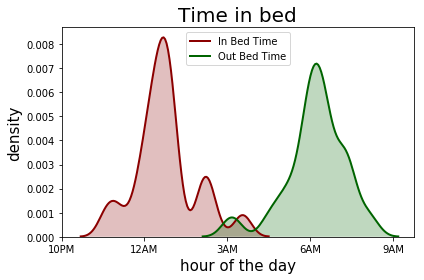

In [17]:
# Density plot of "In bed time" and "Out of bad time" distributions

f,ax = plt.subplots()
sns.kdeplot(df_sleep['In Bed Time'], c='darkred', shade=True, linestyle='-', lw=2)
sns.kdeplot(df_sleep['Out Bed Time'], c='darkgreen', shade=True, linestyle='-', lw=2)
ax.set_title('Time in bed',fontsize=20)
ax.set_ylabel('density',fontsize=15)
ax.set_xlabel('hour of the day',fontsize=15)
plt.xticks(list(range(-200,800,200)),['10PM','12AM','3AM','6AM','9AM'])
f.tight_layout()
plt.show()

### Activity

In [19]:
df_activity = open_data.create_dataset(users,'Activity',replace_na=False) # Import dataset with Activity diary data

In [20]:
# Create dict to map activity reported by users in the activity diary
dict_activity = {0: 'sleeping',
                 1: 'laying down',
                 2: 'sitting',
                 3: 'light movement',
                 4: 'medium movement',
                 5: 'heavy movement',
                 6: 'eating',
                 7: 'small screen usage',
                 8: 'large screen',
                 9: 'coffee/coke',
                 10: 'smoking',
                 11: 'alcohol assumption',
                 12: 'saliva samples'}

df_activity['Activity'] = df_activity['Activity'].replace(dict_activity) # maping activity

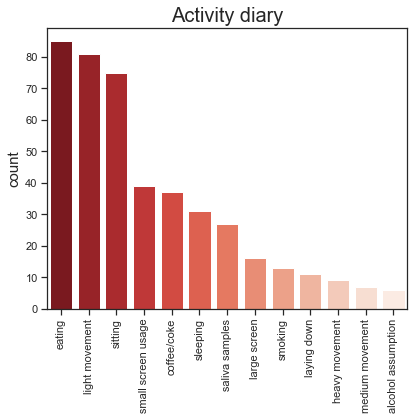

In [22]:
df_activity_count = pd.DataFrame(Counter(df_activity['Activity']).items(),columns=['Activity','count']) # Create pandas DataFrame with actifity count

# Barplot of activity counter
sns.set(style="ticks")
f,ax = plt.subplots(figsize=(6,6))
df_activity_count = df_activity_count.sort_values('count',ascending=False)
sns.barplot(df_activity_count['Activity'],df_activity_count['count'],palette='Reds_r')
plt.xlabel('')
plt.ylabel('count',fontsize=15)
plt.title('Activity diary',fontsize=20)
plt.xticks(rotation=90)
f.tight_layout()
plt.show()

### Actigraph

In [25]:
df_actigraph = open_data.create_dataset(users,'Actigraph') # Import dataset with actigraph data

In [26]:
df_actigraph.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Axis1,459687.0,49.931142,48.572667,1.0,15.00,36.00,69.00,910.00
Axis2,412776.0,56.285380,55.387262,1.0,17.00,41.00,76.00,793.00
Axis3,481858.0,56.543967,53.863007,1.0,18.00,41.00,78.00,919.00
Steps,232694.0,1.112418,0.338917,1.0,1.00,1.00,1.00,4.00
HR,1398557.0,75.613120,17.127616,3.0,63.00,73.00,85.00,251.00
Inclinometer Off,298359.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Inclinometer Standing,467281.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Inclinometer Sitting,433908.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Inclinometer Lying,199009.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Vector Magnitude,542835.0,89.448546,79.140751,1.0,29.15,70.83,125.28,1017.89


### RR-intervals

In [10]:
df_rr = open_data.create_dataset(users,'RR',path).reset_index() # Import dataset with RR intervals data

In [11]:
# Transform Time format in seconds. 0 refers to 12 AM, while positive and negative values refers to pre and post midnight, respectively.
df_rr['timestamp'] = [float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) if y==1 else 
                        float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) + 24*60*60
                        for x,y in zip(df_rr['time'],df_rr['day'])]

# Fiter ectopic beats
df_rr['ibi_s'] = [x if x<2 else np.nan for x in df_rr['ibi_s']]
df_rr['ibi_s'] = [x if x>0.3 else np.nan for x in df_rr['ibi_s']]
# df_rr = df_rr.dropna()

# Compute Heart Rate values from ibi
df_rr['hr'] = [60/x for x in df_rr['ibi_s']]

In [12]:
df_rr[['ibi_s','hr']].describe().T.round(2) # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ibi_s,1665103.0,0.81,0.19,0.30,0.67,0.78,0.92,2.00
hr,1665103.0,78.86,19.73,30.02,65.43,76.43,89.29,199.34


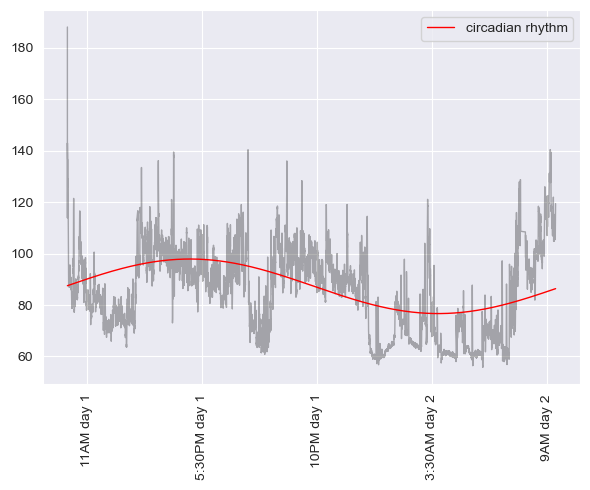

{'amp': 10.602767798902422, 'phase': 0.5003862651438585, 'APhase': 57919.0, 'offset': 87.28893550259951, 'r2': 0.20674833281421878, 'tt': array([ 36618.,  36618.,  36619., ..., 121525., 121525., 121526.]), 'ff': array([87.51931252, 87.51931252, 87.5200834 , ..., 86.36930248,
       86.36930248, 86.37007063])}


In [13]:
df_user_example = df_rr[df_rr['user']=='user_1'].dropna()
res_single = circadian.fit_sin(df_user_example['timestamp'],df_user_example['hr'].rolling(60,min_periods=1).mean(),plot=True) # fit single component cosinor curves
print(res_single)

In [11]:
# Single component cosinor analysis
results = {}

for user in users:
    df_user = df_rr[df_rr['user']==user].dropna()
    results[user] = circadian.fit_sin(df_user['timestamp'],df_user['hr'],plot=False)
    
df_circadian = pd.DataFrame(results)

In [12]:
df_circadian.T[['amp','phase','offset','r2']].astype(float).describe() # Descriptive statistics

,amp,phase,offset,r2
count,21.000000,21.000000,21.000000,21.000000
mean,11.420169,0.392904,76.960570,0.232420
std,5.322403,0.762214,6.992811,0.159349
min,1.039398,-1.654571,65.975072,0.001986
25%,7.905381,0.215904,72.567970,0.095833
50%,11.870312,0.564229,75.972583,0.193091
75%,14.307344,0.869257,78.354160,0.304527
max,21.847015,1.340508,92.898146,0.526205


#### HRV analysis example

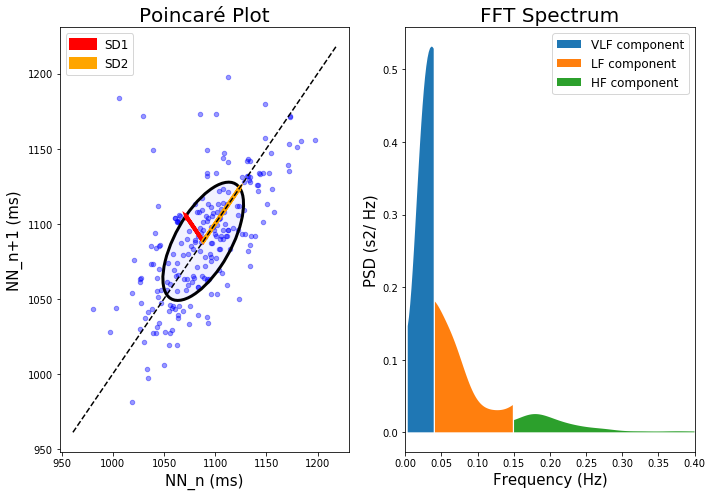

In [13]:
# select a 5 minutes time window for HRV analysis
df_user["window"] = df_user.timestamp.diff().dropna().cumsum().pipe(lambda x: pd.to_timedelta(x, "s")).dt.floor("5min")
df_window = df_user[df_user.window.astype(str) == '0 days 20:00:00.000000000']

HRV_analysis.plot_HRV(df_window)

### Saliva

In [6]:
df_saliva = open_data.create_dataset(users,'saliva') # Import dataset with saliva data

NO data for user_21


In [7]:
df_saliva.groupby('SAMPLES').describe().T # Descriptive statistic of hormone concentration before sleep and at wake up time

SAMPLES               before sleep       wake up
Cortisol NORM  count  2.000000e+01  2.000000e+01
               mean   2.815678e-02  6.932549e-02
               std    3.125744e-02  5.454448e-02
               min    1.201710e-02  1.557236e-02
               25%    1.513441e-02  4.110202e-02
               50%    1.983127e-02  5.204083e-02
               75%    2.636309e-02  8.302529e-02
               max    1.557774e-01  2.612515e-01
Melatonin NORM count  2.000000e+01  1.900000e+01
               mean   8.467078e-09  7.309298e-09
               std    6.851726e-09  6.525401e-09
               min    1.629907e-09  8.283802e-10
               25%    3.182911e-09  3.088560e-09
               50%    5.912706e-09  5.730512e-09
               75%    1.190672e-08  9.146732e-09
               max    2.396239e-08  2.853905e-08

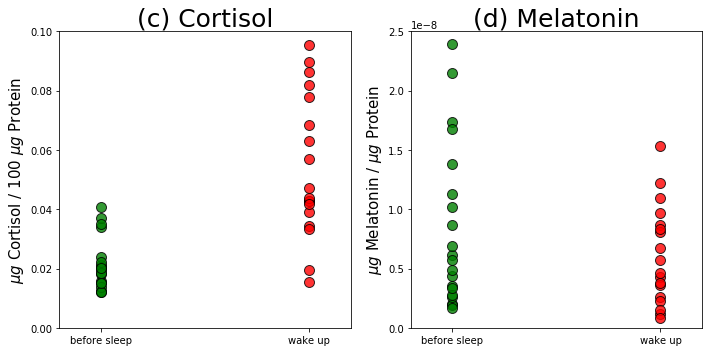

In [12]:
# Line plot of Cortisol and Melatonin concentrations obtained from saliva sample. Differencebetween “before sleep” and “wake up” hormones concentration

f,ax = plt.subplots(1,2,figsize=(10,5))
for w,c in zip(['before sleep','wake up'],['g','r']):
    df_w = df_saliva[df_saliva['SAMPLES']==w]
    df_w = df_w[df_w['Cortisol NORM']<0.1]
    ax[0].scatter([w]*len(df_w), df_w['Cortisol NORM'], c=c, label=w, edgecolors='k', s=100, alpha=0.8)
ax[0].set_title('(c) Cortisol',fontsize=25)
ax[0].set_ylabel('$\mu g$ Cortisol / 100 $\mu g$ Protein',fontsize=15)
ax[0].set_xlabel('')
plt.sca(ax[0])
plt.xlim(-0.2,1.2)
plt.ylim(0,0.10)

for w,c in zip(['before sleep','wake up'],['g','r']):
    df_w = df_saliva[df_saliva['SAMPLES']==w]
    df_w = df_w[df_w['Melatonin NORM']<2.5e-8]
    ax[1].scatter([w]*len(df_w), df_w['Melatonin NORM'], c=c, edgecolors='k', s=100, alpha=0.8)
ax[1].set_title('(d) Melatonin',fontsize=25)
ax[1].set_ylabel('$\mu g$ Melatonin / $\mu g$ Protein',fontsize=15)
ax[1].set_xlabel('')
plt.sca(ax[1])
plt.xlim(-0.2,1.2)
plt.ylim(0,2.5e-8)

f.tight_layout()
plt.show()